# Các nội dung chính
1. Mục tiêu:
*   Nắm được các bước cơ bản trong khâu tiền xử lí dữ liệu.


2. Dữ liệu:
* Dữ liệu bất động sản - *Bengaluru_House_Data*
> Gồm các trường dữ liệu: location, size, total_sqft, price, ...


> Link Kaggle: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data




3. Yêu cầu:
* Sử dụng các công cụ (Pandas, Seaborn, ...) để thực hiện xem xét, đánh giá đặc điểm của dữ liệu, từ đó đưa ra phương án tiền xử lí dữ liệu (làm sạch, trích xuất thông tin ban đầu, ...)




# Nội dung thực hành

In [ ]:
#Nếu chạy trên Google Colab thì cần kết nối với máy chủ trước
from google.colab import drive
drive.mount('/content/drive')

### Chuẩn bị các thư viện cần thiết

In [ ]:
import numpy as np #Làm việc với các dữ liệu mảng nhiều chiều
import pandas as pd #Giúp làm việc với các dữ liệu dạng bảng
import matplotlib.pyplot as plt #Thư viện hỗ trợ trực quan hóa dữ liệu
import seaborn as sns #Thư viện giúp trực quan hóa dữ liệu, được xây trên matplotlib

### Load dữ liệu từ file đã tải về

1. Đọc dữ liệu bằng pandas, dạng dataframe

In [ ]:
%cd /content/drive/MyDrive/ML_course/Preprocessing_practice/Practice/Bangalore_House_Price_data
# Nếu chạy trên colab thì cũng cần trỏ tới thư mục phù hợp để lấy data
# cd DIR_PATH

In [6]:
path = 'Bangalore_House_Price_data/Bengaluru_House_Data.csv'
df_raw = pd.read_csv(path, delimiter=',')
df_raw.shape

(13320, 9)

2. Review 5 sample đầu tiên

In [4]:
df_raw.head() # return DataFrame

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


3. Review 5 sample cuối cùng

In [5]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


### Exploratory Data Analysis (EDA)

In [7]:
df = df_raw.copy() #Tạo bản sao để thực hiện EDA

1. Thông tin cơ bản về dữ liệu, tên trường, số giá trị non-null của từng trường, kiểu dữ liệu của từng trường

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


2. Thống kê 1 số thuộc tính cơ bản của dữ liệu, bao gồm count, mean, std, min, max, quartile

In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


3. Thống kê các giá trị duy nhất của từng trường và số lần xuất hiện của chúng

In [9]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-----------

4. Xem xét tương quan về giá trị của các cặp trường số

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


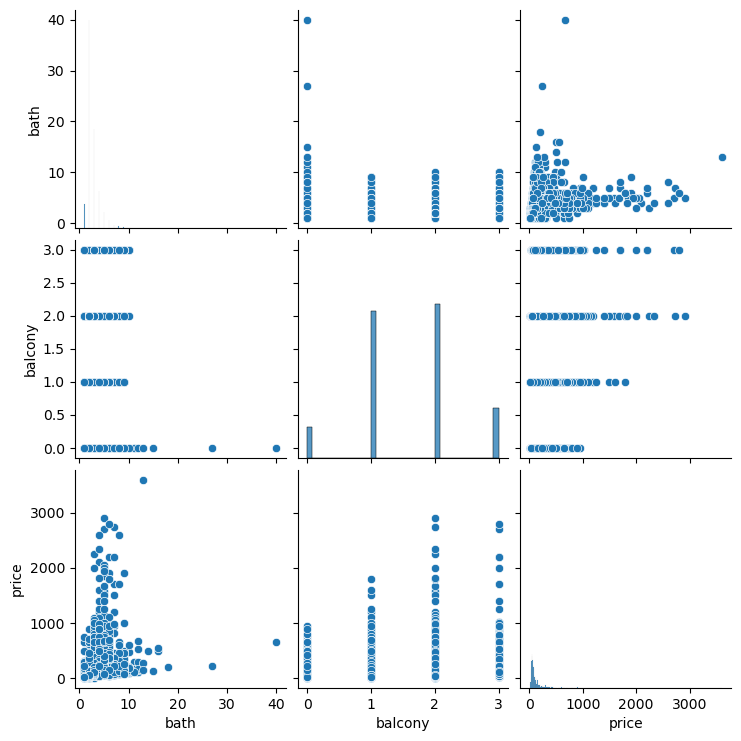

In [10]:
sns.pairplot(df)

<Axes: >

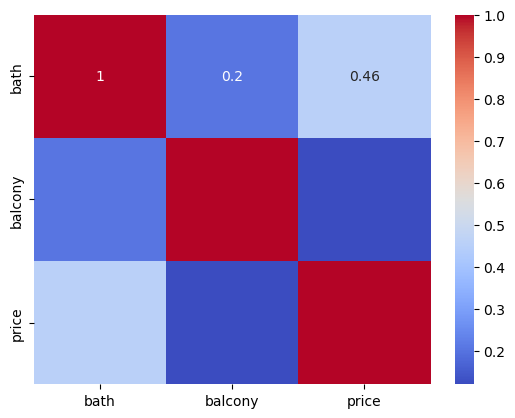

In [8]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

In [ ]:
sns.heatmap(df.corr(),cmap="coolwarm", annot=False)

### Chuẩn bị dữ liệu để huấn luyện mô hình

#### Xử lí các giá trị Null/ Nan

1. Thống kê tỉ lệ giá trị null của từng thuộc tính

In [9]:
df.isnull().mean()*100  # Tỷ lệ giá trị null của từng thuộc tính

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

2. Loại đi trường society vì tỉ lệ null cao (41%)

In [10]:
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

3. Thay thế giá trị null trong trường balcony bằng giá trị trung bình của các giá trị not null

In [11]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

4. Xóa đi các điểm dữ liệu (hàng) có giá trị nan (không có giá trị)

In [12]:
df3 = df2.dropna()
df3.shape

(13246, 8)

In [13]:
df3.isnull().sum() #Thống kê lại xem đã xử lí hết các dữ liệu null hay chưa?

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

#### Xử lí các trường thuộc tính

In [16]:
#Cho phép in ra toàn bộ các giá trị output có thể của câu lệnh
pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 10)

1. Converting 'total_sqft' cat feature in numeric (float)

In [17]:
# Xem xét trường total_sqft
df3['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: count, Length: 2067, dtype: int64

In [18]:
#Xử lí các giá trị của trường total_sqft và lưu vào một biến tạm

total_sqft_float = [] #Biến tạm để lưu giá trị được xử lí
for str_val in df3['total_sqft']:
  try:
    total_sqft_float.append(float(str_val))
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_float.append((float(temp[0])+float(temp[-1]))/2)
    except:
      total_sqft_float.append(np.nan) #Gia tri ngoai le se duoc dat thanh null

df4 = df3.reset_index(drop=True)

In [19]:
# Thêm trường total_sqft_float:

df5 = df4.join(pd.DataFrame({'total_sqft_float':total_sqft_float}))
df5.head() #Quan sát kết quả sau khi xử lí

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [20]:
# Xem xét lại thông tin về các giá trị null
df5.isnull().sum()

area_type            0
availability         0
location             0
size                 0
total_sqft           0
bath                 0
balcony              0
price                0
total_sqft_float    46
dtype: int64

In [21]:
# Loại bỏ các hàng có giá trị null
df6 = df5.dropna()
df6.shape

(13200, 9)

In [22]:
# Xem lại thông tin của dataframe
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13200 non-null  object 
 1   availability      13200 non-null  object 
 2   location          13200 non-null  object 
 3   size              13200 non-null  object 
 4   total_sqft        13200 non-null  object 
 5   bath              13200 non-null  float64
 6   balcony           13200 non-null  float64
 7   price             13200 non-null  float64
 8   total_sqft_float  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


2. Làm việc với feature: *size*

In [23]:
# Quan sát sự phân bố giá trị của trường 'size' với value_counts
df6['size'].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
              ... 
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, Length: 31, dtype: int64

In [24]:
#Chuyển thuộc tính số phòng từ dạng category về dạng numeric
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noise = ",str_val)

In [25]:
#Đánh lại index cho các hàng theo dãy số tự nhiên liên tiếp
df6 = df6.reset_index(drop=True)

In [26]:
# Thêm trường dữ liệu số phòng (bhk)
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [27]:
#In ra kết quả thực hiện các thao tác kể trên?
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


3. Phát hiện ngoại lệ (outlier) và loại bỏ
* Dựa trên biểu đồ boxplot/ hoặc công cụ khác để phát hiện và loại bỏ các điểm ngoại lai:

<Axes: xlabel='total_sqft_float'>

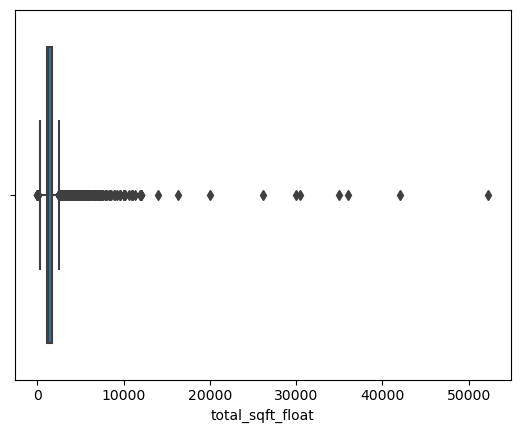

In [28]:
# Xem xét trường diện tích:
sns.boxplot(x = df7['total_sqft_float'])

<Axes: xlabel='total_sqft_float'>

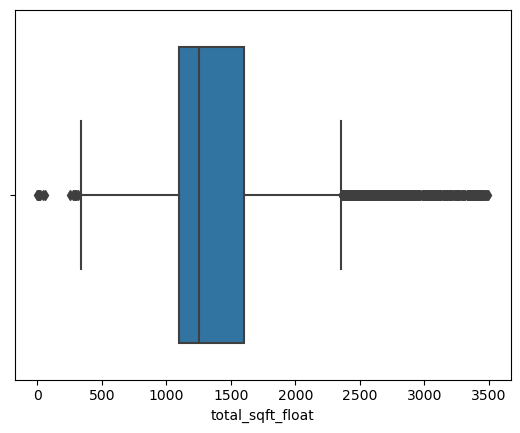

In [29]:
# Chọn ngưỡng diện tích là 3500 để xem xét
df_temp7 = df7[df7['total_sqft_float'] < 3500]
sns.boxplot(x = df_temp7['total_sqft_float'])

(10977, 10)

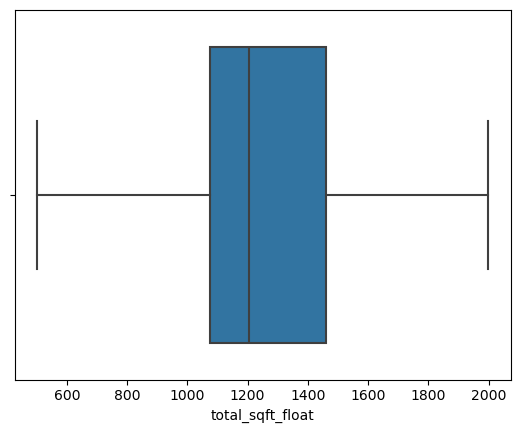

In [30]:
# Loại bỏ đi các điểm dữ liệu có diện tích >= 2200 hoặc <= 300
# (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
df8 = df7[(df7['total_sqft_float'] > 500) & (df7['total_sqft_float'] <2000)]
sns.boxplot(x = df8['total_sqft_float'])
df8.shape

In [31]:
# Tạo thêm trường dữ liệu price_per_sqft (giá/ diện tích feet vuông)
df8 = df8.reset_index(drop=True)
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_float']
df8.head()

,area_type,availability,location,size,total_sqft,...,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,...,1.0,39.07,1056.0,2,3699.810606
1,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,...,3.0,62.00,1440.0,3,4305.555556
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,...,1.0,95.00,1521.0,3,6245.890861
3,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,...,1.0,51.00,1200.0,2,4250.000000
4,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,...,1.0,38.00,1170.0,2,3247.863248


In [32]:
df8.price_per_sqft.describe()

count    10977.000000
mean      6168.807617
std       3646.940348
min       1166.666667
25%       4166.666667
50%       5179.856115
75%       6666.666667
max      76923.076923
Name: price_per_sqft, dtype: float64


## Bài tập bổ sung (tự làm)

> Phần bài tập này là các câu hỏi  mở rộng, làm tiếp theo bài toán ở trên. Học viên cần viết mã để thực hiện các yêu cầu dưới đây:

Bài tập 0: Sử dụng sns.boxplot() để quan sát đặc điểm phân bố dữ liệu của các trường số, mỗi trường này có outlier ko?

In [ ]:
# Sử dụng boxplot để quan sát phân bố của dữ liệu, phát hiện ngoại lai (xử lí nếu cần) của từng trường dữ liệu trong vars
# Gợi ý: sns.boxplot(data_field)

vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16,12))

#Code ở đây

Bài tập 1: Viết hàm bỏ đi các điểm dữ liệu có price per sqft dựa trên mean, std của các ngôi nhà dựa trên từng vị trí

> Gợi ý: Xét trên từng vị trí (location), ngôi nhà thỏa mãn phải có $price\_per\_sqft \in [mean - std, mean + std]$

In [ ]:
def remove_pps_outliers(df):
  #Code ở đây
#--------
df9 = remove_pps_outliers(df8)
df9.shape

Bài tập 2: Loại bỏ outlier xét theo trường bkh (số phòng)

Xét theo từng khu vực địa lí và theo từng loại nhà với số lượng phòng khác nhau, có một số ngôi nhà có giá không hợp lí (outliers), hãy tìm cách loại bỏ các outlier này. Cần ghi rõ quy tắc ghi nhận outlier

In [ ]:
#location_df.groupby('bhk')

In [ ]:
def remove_bhk_outliers(df):
  # Code ở đây

df10 = remove_bhk_outliers(df9)
df10.shape

Bài tập 3: Loại bỏ outlier khi xét trường 'bathroom'

In [ ]:
df10.bath.unique() #Có thể quan sát thấý một số căn nhà có số phòng tắm quá lớn (VD: 10!!!)

In [ ]:
df10[df10.bath > df10.bhk+2]

In [ ]:
df11 = #Code ở đây, sao cho: df10[df10.bath < df10.bhk+2]
df11.shape

In [ ]:
df11.head()

In [ ]:
# Quan sát lại kết quả sau khi xử lí với boxplot

# (Dùng lại hàm đã code bên trên)

Bài tập 4: Xem xét bỏ đi các trường không cần thiết

Gợi ý: bỏ đi ['area_type', 'availability',"location","size","total_sqft"]

In [49]:
df12 = #Code ở đây
df12.head()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
3,2.0,3.0,44.0,1250.0,3,3520.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [ ]:
#Lưu kết quả xử lí cuối cùng:

df12.to_csv("clean_data.csv", index=False)

Bài tập 5*: Viết hàm trực quan hóa thể hiện mối tương quan giữa tổng diện tích (total_sqft) và giá nhà (price) theo từng vị trí địa lí (location) (tùy chọn minh họa theo 2 vị trí nào đó), của những căn nhà có 2 hoặc 3 phòng. Và cần phân biệt rõ điểm dữ liệu nào tương ứng với nhà có 2 phòng, điểm nào tương ứng với nhà có 3 phòng?

Gợi ý: Kết quả tương tự như hình dưới/ hoặc biểu đồ khác có ý nghĩa tương đương

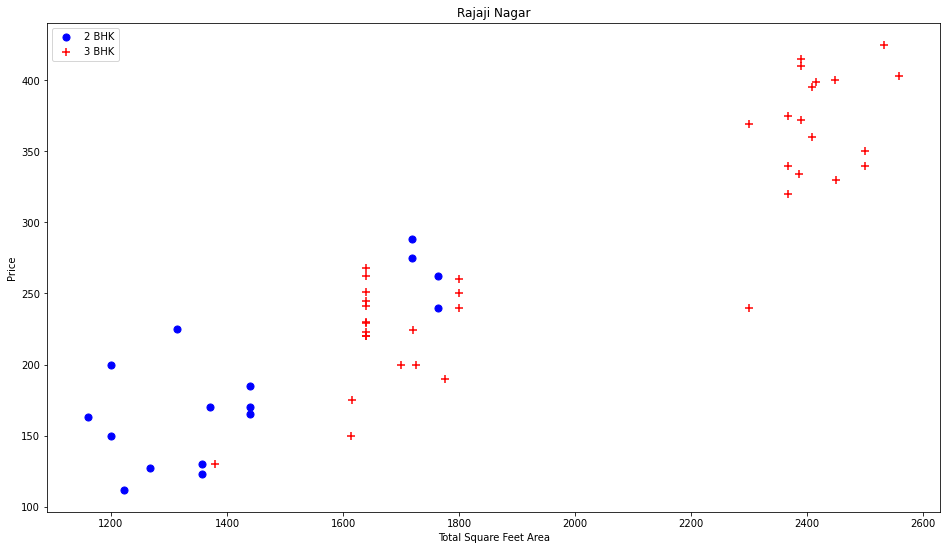

In [ ]:
#Gợi ý: Sử dụng plt.scatter() .... hoạc câu lệnh khác tương đương. Làm với df9

def plot_scatter_chart(df,location):
  #Viết code ở đây

In [ ]:
plot_scatter_chart(df9, "Hebbal")

Bài tập 6*: Thực hiện các câu lệnh để trả lời các câu hỏi dưới đây:

* Thống kê giá nhà theo từng loại khu vực (area_type). Làm với df9:
* xem xét theo từng khu vực, thì giá nhà trung bình (price_per_sqft) là bao nhiêu, tương quan về giá nhà trung bình giữa các khu vực

*Gợi ý*: Phần này có thể đưa ra kết quả dạng bảng hoặc biểu đồ (cột, histogram, ...).
 - Sử dụng các lệnh: df.groupby(), df.sortvalues(), ... để trích xuất giá trị
 - Sử dụng matplotlib: plt.bar(), ...


In [ ]:
# Code ở đây